(Group 24)

(Benjamin Fletcher, Konrad Retzlaff, Sebastian Schmülling)

(i6308020, i6331164, i6304238)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 2

By completing and delivering the clinic tasks you will know how to :

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in `sklearn`;
- Carry out simple logistic regression analysis;
- Evaluate classification models based on different metrics;
- Assess how your model performance can improve
- Reflect on the greater impact of the models you develop

---

## Important Dates

- Homework release: Fri, 7th Feb
- **Homework due**: Mon, 17th Feb late night (wildcards possible, apply to the group)

---

##  Some rules

* We have provided `TODO` comments in the code cells that you need to fill out with your solutions. For some questions, we have also provided `Your response` comments, where you should provide a textual answer.

* You are allowed to use any built-in Python library that is included in the `requirements.txt` for this homework. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.



---


## Grading 
- The homework has a total of 100 points, distributed as follows:
    - Part 1: Data Preprocessing (20 points)
    - Part 2: Linear Regression (30 points)
    - Part 3: Supervised Learning (40 points)
    - Part 4: The Aftermath (5 points)

## Context

Within DACS, you are excited to start an internship as a data scientist.
After rounds of interviews, you have been selected to work with the biggest car dealership in the Netherlands !

Your mentor at the company Jerasimosu, has explained to you that the company is interested in a pricing model for used cars. 

- Jerasimosu: "We have a lot of used cars in our inventory, and we need to determine the price at which we should sell these cars. We have some ideas about the factors that influence the price of a used car, but so far we have just been using our experience and intuition to determine the price of a used car. Sometimes it works, but probably we can do better and a more data-driven approach would also help our new employees in the sales team as they have less experience."

- You: "That sounds like a great project! What kind of data do we have?"

- Jerasimosu: "We sell all kinds of cars here, but maybe we can start with a specific brand and model. For example, the Toyota Corolla is the best-selling car worldwide in 2023, and we have a lot of data on it. We can start by analyzing the data on used Toyota Corolla cars. If it works well, we can extend the analysis to other brands."

The dataset contains the following columns:

- `Age`: Age of the car in months.
- `Mileage`: Number of distance the car has been driven. (km or miles)
- `FuelType`: Fuel type of the car (Petrol, Diesel, or CNG)
- `HP`: Horsepower
- `MetColor`: Is the color of the car metallic? (Yes=1, No=0)
- `Automatic`: Is the car automatic? (Yes=1, No=0)
- `CC`: Cylinder volume in cubic centimeters
- `Doors`: Number of doors
- `Weight`: Weight of the car in kilograms
- `Price`: Price of the car in euros


## Data

The data is provided in the `data` folder and it contains the following 3 csv files:
- `Task1-2.ToyotaCorolla.csv` for Part 1 and Part 2
- `Task3.ToyotaCorolla_sales_3months.csv` for Part 3

You should not use any other data source for this homework.

For some questions, you might need to slightly modify the data. But overall, you should avoid making any major changes to the data, which may affect your analysis.

## References:

The data is based on the ToyotaCorolla dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Toyota+Corolla).
We have made some modifications to the original dataset, so please use the data provided in the `data` folder in the course repo.

## Task 1 (20 pts) - Get to know the data

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import sklearn

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)


**1.1 (2 pts)**: Load the data from the file `Task1-2.ToyotaCorolla-raw.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Hint: A naive loading of the data will raise an error. You will need to figure out how to load the data correctly. (Hint: localise which row is causing the error)

In [71]:
#TODO

# 1. Load the data
# error handling: In line 33 there were 12 instead of 11 columns. This was because of a comma in the Price column. Commas are common in larger numbers as a seperator.
# In this case this was a mistake which lead to the wrong interpretation of another column. The comma was removed and the file was saved again. 
df_corolla = pd.read_csv('data/Task1-2.ToyotaCorolla.csv')
df_corolla_origin = pd.read_csv('data/Task1-2.ToyotaCorolla.csv')
df_corolla.head(5)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23.0,46986.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,EURO
1,11878.0,23.0,72937.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
2,12050.0,24.0,41711.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
3,12914.0,26.0,48000.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1165.0,CHF
4,11878.0,30.0,38500.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1170.0,CHF


In [72]:
df_corolla.dtypes

Price         object
Age          float64
Mileage       object
FuelType      object
HP           float64
MetColor     float64
Automatic    float64
CC           float64
Doors        float64
Weight       float64
Currency      object
dtype: object

**1.2 (2 pts)**: Check if there are nan values in the Dataframe. If there are, try to find out which row is problematic and fix it. If you can't fix it, drop the row.

In [73]:
#TODO

index_list = []

for index, row in df_corolla.iterrows():
    if row.isna().any():
        print(index,row)
        index_list.append(index)
#print(index_list)

#seems there is an issue with the comma type in row 906. Let's check it out

row = df_corolla.iloc[index_list[0]]
type(row)
#print(row)


if isinstance(row['Price'], str) and ';' in row['Price']:
    # Split the string into individual parts:
    split_values = row['Price'].split(';')


#print(split_values)

columns = df_corolla.columns

#print(df_corolla.dtypes)

for col, val in zip(columns, split_values):

    if (df_corolla[col].dtype == np.float64) : 

        converted_val = float(val)
        df_corolla.at[index_list[0], col] = converted_val
    else:
        df_corolla.at[index_list[0], col] = val
    

print("\nFixed row:\n\n",df_corolla.iloc[index_list[0]])



# Validate that there are no more NaN values in the dataset

index_list = []

for index, row in df_corolla.iterrows():
    if row.isna().any():
        print(index,row)
        index_list.append(index)
print("\nRows with nan values:",len(index_list))

906 Price        8423.0;68;58860.0;Petrol;110;1;0;1600;3;1055;CHF
Age                                                       NaN
Mileage                                                   NaN
FuelType                                                  NaN
HP                                                        NaN
MetColor                                                  NaN
Automatic                                                 NaN
CC                                                        NaN
Doors                                                     NaN
Weight                                                    NaN
Currency                                                  NaN
Name: 906, dtype: object

Fixed row:

 Price         8423.0
Age             68.0
Mileage      58860.0
FuelType      Petrol
HP             110.0
MetColor         1.0
Automatic        0.0
CC            1600.0
Doors            3.0
Weight        1055.0
Currency         CHF
Name: 906, dtype: object

Rows with nan valu

**1.3 (4 pts): Compute the mean, median of the `Price` column.**

- Compute the mean and median of the `Price` column. If you encounter error, try to understand why this error is happening and propose a solution.

Hint: Is all values in the `Price` column numerical?


In [74]:
#TODO

# 1. follow hint 

print(df_corolla.dtypes)

#One can see thta the column "Price" is of type object. This is because the column contains strings with currency symbols and commas.
#After inspecting the column "Price" manually there is some data cleaning necessary before we can convert the column to a float.

#Proposed solution. Remove all commas and currency symbols from the column "Price" and convert it to a float.
df_corolla['Price'] = df_corolla['Price'].str.replace(',', '', regex=False)\
                                           .str.replace('"', '', regex=False)\
                                           .str.replace('$', '', regex=False)\
                                           .str.replace('€', '', regex=False)\
                                           .str.replace('£', '', regex=False)\
                                           .astype(float)

#3. calculate the mean and median

mean_price = df_corolla['Price'].mean()
median_price = df_corolla['Price'].median()

print("\n\nMean price:",mean_price)
print("Median price:",median_price)

#4. After observing that the the mean price is absurdly high, compared to the prices that are settled around 10k, one can find an outlier in row 34:    1.539850e+16.
#   Inspecting the row in the csv file, once can see that the price is 15.398,50. Howevever, it is written in an unreasonable format as a string: "15,398,499999999998".
#   We simply corrected the entry manually.

#print(df_price.iloc[1120])
#df_price.head(100)
#print("Sorted values:\n",df_price['Price'].sort_values())

# Now the mean and median prices are more reasonable



Price         object
Age          float64
Mileage       object
FuelType      object
HP           float64
MetColor     float64
Automatic    float64
CC           float64
Doors        float64
Weight       float64
Currency      object
dtype: object


Mean price: 9439.505809951286
Median price: 8595.0


**1.4 (4 pts): Convert Units**

You notice that some prices are in CHF (Swiss Francs), while others are in EUR (Euros) or GBP (British Pounds). Additionally, for cars priced in GBP, the mileage is in miles rather than kilometers.

For consistency, convert all prices to EUR and all distances to kilometers.

- Exchange rates:
  - 1 CHF = 1.05 EUR
  - 1 GBP = 1.15 EUR
  - 1 mile = 1.61 km

Make the following conversions:
1. Convert prices in CHF or GBP to EUR, rounding to the nearest integer.
2. Convert distances in miles (for GBP cars) to kilometers, rounding to the nearest integer.
3. Drop the 'Currency' column.
4. Calculate the min, mean, median and max of the 'Price' and 'Distance' columns after the conversion.

In [77]:
#TODO


#step 1 ,conversion of prices
rates = {'CHF': 1.05, 'EURO': 1.00, 'GBP': 1.15}
df_corolla['Price'] = df_corolla.apply(lambda r: int(round(r['Price'] * rates[r['Currency']])), axis=1)



#step 2, conversion of mileage

#but first data cleaning and conversion  of the column "Mileage" to float (necessary for the conversion, after conversion it will be casted to int)

df_corolla['Mileage'] = df_corolla['Mileage'].str.replace(',', '', regex=False)\
                                           .str.replace('"', '', regex=False)\
                                           .str.replace(r'[^0-9.]', '', regex=True)\
                                           .astype(float)

df_corolla.iloc[34]
gbp_mask = df_corolla['Currency'] == 'GBP'
df_corolla.loc[gbp_mask, 'Mileage'] = df_corolla.loc[gbp_mask, 'Mileage'] * 1.61
df_corolla['Mileage'] = df_corolla['Mileage'].round().astype(int)

#step 3, drop the currency column

df_corolla.drop(columns=['Currency'], inplace=True)

#step 4, calculate statistics

print('Price min:', df_corolla['Price'].min())
print('Price mean:', df_corolla['Price'].mean())
print('Price median:', df_corolla['Price'].median())
print('Price max:', df_corolla['Price'].max())

print('Distance min:', df_corolla['Mileage'].min())
print('Distance mean:', df_corolla['Mileage'].mean())
print('Distance median:', df_corolla['Mileage'].median())
print('Distance max:', df_corolla['Mileage'].max())

Price min: 3946
Price mean: 9879.322894919973
Price median: 9025.0
Price max: 29478
Distance min: 1
Distance mean: 68491.0925539318
Distance median: 63328.0
Distance max: 243000


**1.5 (2 pts): Analyze Average Price**

A.  Print the average price for each fuel type. Determine which fuel type has the highest average price.

B.  Print the average price for different numbers of doors. Determine which number of doors has the highest average price.

In [81]:
#TODO

avg_price_by_fuel = df_corolla.groupby('FuelType')['Price'].mean()
print(avg_price_by_fuel)
print("Highest average price by fuel:", avg_price_by_fuel.idxmax())

avg_price_by_doors = df_corolla.groupby('Doors')['Price'].mean()
print(avg_price_by_doors)
print("Highest average price by doors:", avg_price_by_doors.idxmax())


FuelType
CNG        8752.176471
Diesel    10366.490323
Petrol     9834.777866
Name: Price, dtype: float64
Highest average price by fuel: Diesel
Doors
2.0     7347.000000
3.0     9320.285714
4.0     9024.297101
5.0    10578.637982
Name: Price, dtype: float64
Highest average price by doors: 5.0


**1.6 (2 pts): Relationship Between Car Age and Price**

It is intuitive that an older car tends to be cheaper, and a car with more mileage might also be less expensive. 

To explore this intuition, create two scatter plots:
1. Car Age vs Price
2. Mileage vs Price

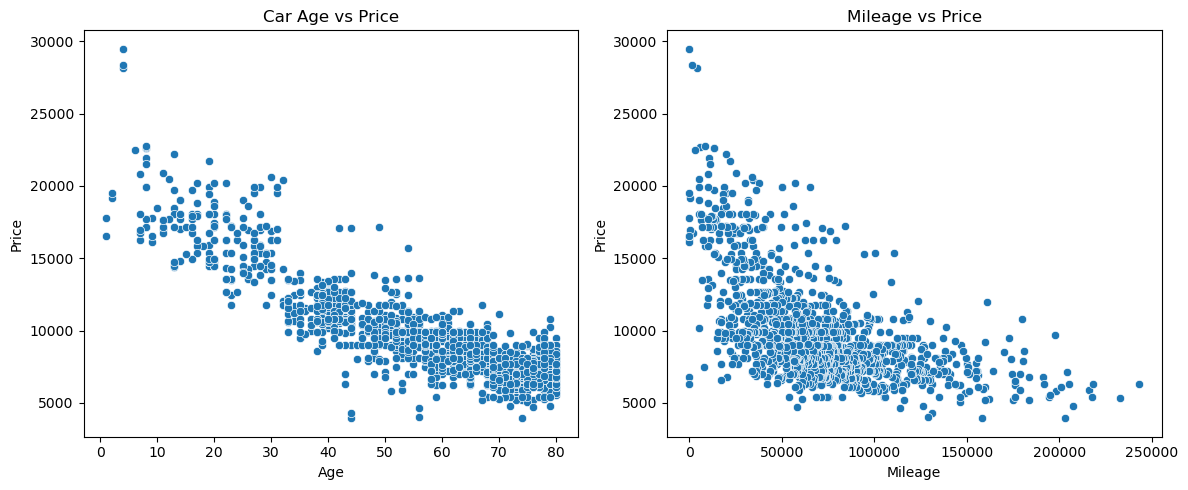

In [84]:
#TODO
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='Age', y='Price', data=df_corolla)
plt.title('Car Age vs Price')

plt.subplot(1,2,2)
sns.scatterplot(x='Mileage', y='Price', data=df_corolla)
plt.title('Mileage vs Price')

plt.tight_layout()
plt.show()

**1.7 (4 pts): Correlation Between Price and Mileage**

The relationship between car price and mileage appears non-linear, with a steeper price drop initially followed by a flatter curve.

A.(2 pts)  Calculate both the Pearson and Spearman correlations between the price of the car and the distance driven.


In [85]:
#TODO

pearson_corr = df_corolla['Price'].corr(df_corolla['Mileage'], method='pearson')
spearman_corr = df_corolla['Price'].corr(df_corolla['Mileage'], method='spearman')

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)

Pearson correlation: -0.5635094857323714
Spearman correlation: -0.6043701109847422



B.(2 pts)  Which correlation value is higher? Does this result align with your expectations?

Your Response:

From the plots one could already see a negative correlation between mileage and price. This supports our intuition that car with more mileage tend to be less expensive. 
For the pearson correlation we know that -1 indicates a perfect negative linear correlation. Since our correlation is negative, but not perfectly linear negative this was to be ecpected. As mentioned this is clearly viewable in the scatter plot from above.
The correlation value of the Spearman corelation value is higher. It assesses how well the relationship between two variables can be described using a monotonic function. It is based on the ranked values for each variable rather than the raw data. 
Thus the intuition would also say that this correlation value should be higher because it measures no linear relationship, but rather the ranked values. And as we can, the scatter plot gives a hint of non-linearity.

## Part 2 Linear Regression (30 pts)

You want to build a linear regression model to predict the price of a car based on the features you have.



**2.0 (8 pts) Helper functions**

Before building the linear regression model, you need to implement some helper functions.

 Implement the `accuracy` , `precision`, `recall` and `f1_score` functions. 

1. These functions should take in the true labels(`np.array`) and the predicted labels(`np.array`) and return the corresponding metric. 
2. They should follow the convention that the positive class is 1 and the negative class is 0.
3. Apply the functions to the following data:

```python
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
```

- Compare the results with the implementation in `sklearn` and see if they match.

In [8]:
#TODO


**2.1 (6 pts) Preprocess the Data**

To prepare your data for building a linear regression model, complete the following steps:

A.(1 pts) Convert the categorical variables to one-hot encoding using the `pd.get_dummies()` function, how many columns do you have after the one-hot encoding? (P.S. You may want to avoid introducing multicollinearity with one-hot encoding, what should you do to avoid this?)


In [9]:
#TODO

B.(1 pts) Split the data into features (X) and target (y) variables. The target variable is the 'Price' column. Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. How many samples are in the training set and how many samples are in the test set?


In [10]:
#TODO

C.(1 pts) Why do we split the data into only train-test sets but not train-validation-test sets? 

Your Response:

//**//

D.(1 pts) **Standardize the Features**: Use `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`. Print the average and standard deviation of the training set after standardization.

In [11]:
#TODO

E.(2 pts) Should we first standardize the data and then split it into train and test sets or vice versa?   why?

Your Response:

//**//

**2.2 (10 pts) Train and Evaluate the Linear Regression Model**

To train a linear regression model using and evaluate its performance, follow these steps:

1. (2 pts) Train a linear regression model on the training dataset using `sm.OLS` from `statsmodels`, print the summary of the model using `model.summary()`.


In [12]:
#TODO

2. (2 pts) Evaluate the model on the test dataset using the square root of the mean squared error (RMSE) metric. 
   1. Report the RMSE value.
   2. Your boss wants to know how far off the model's predictions are from the actual price of the car. What would you tell him? Given a number and explain how you got it.


In [13]:
#TODO

Your Response:

//**//

3. (2 pts) Report the R² score on the test dataset and interpret it.


In [14]:
#TODO

Your Response:

//**//

4.  (2 pts) Which features are statistically significant at a 5% significance level? 

In [15]:
#TODO

5.  (2 pts) Determine which two feature have the highest coefficient? What does it imply?

Your Response:

//**//

**2.3 (2 pts): Improvement Discussion**

- Suggest a few additional features that could potentially explain this remaining variance in the data ( at least 2 features).

Your Response:

//**//

**2.4 (2 pts): Identifying Confounding Variables**

The feature "Weight" shows a very low p-value and a high coefficient, but it doesn't seem to be a major factor for customers buying a second-hand car. You go to your mentor Jerasimosu to discuss this issue. Indeed, Jerasimosu suggests that never in his career has he seen a customer who asked for the weight of a car before buying it.
You suspect that there might be a confounding variable that is correlated with the car's weight and significantly influences its price.

- Suggest a possible confounding variable that may be correlated with the car's weight and significantly influence its price (it doesn't need to be a variable in the dataset). Explain why this variable could be a confounding variable.

Your Response:

//**//

**2.5 (2 pts): Adding an Inverse Mileage Term**

From the previous scatter plot, the relationship between car price and mileage appears non-linear, with a steep price drop initially and then a flattening. A suitable approach to model this behavior is by incorporating an inverse term of mileage.

- Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.

In [16]:
#TODO

## Part 3 Supervised Learning (40 pts)


After completing your analysis, you're satisfied with the results. You handed the Jupyter notebook over to your mentor.

(Fun fact: The name "Jupyter" is derived from Julia, Python, and R—three programming languages that the platform was originally designed for.)

Your mentor Jerasimosu is very impressed with your work and asks you the following question:

“
This looks great! It will be very useful for our sales team. While looking at the results, I realized that there might be one thing that we can improve. 
For companies like us, it is important to sell the cars quickly. If we are patient, we might be able to sell the car for a higher price, but that’s not always the best strategy. We need to consider the maintenance costs for the car, the cash flow and the fact that the price of the car decreases over time."

He then continues:
"Three months is a sweet spot for us. If we can sell the car within the first three months, it is great. If not, it is worth considering lowering the price to sell it faster and increase our cash flow. I can ask Ivan from Sales to collect data in the last few months on whether the car was sold within the first three months or not. This would be great if you could have a model that tells us if the car will be sold in the first three months or not. "

This sparks your interest, and soon Ivan has provided you with the new data containing an additional column `sold_within_3_months` which is a binary variable indicating whether the car was sold within the first three months or not.

Note: The data for this part is in the file `Task3.ToyotaCorolla_sales_3months.csv` and it has already unified the currency and distance units.

In [17]:
data_df = pd.read_csv('data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
print(data_df.head())

NameError: name 'pd' is not defined


**3.1 (2 pts): Preprocess the Data**
- （1 pts）How many cars in the dataset were sold in the first three months, and how many were not? 

In [18]:
#TODO

- (1 pts) Preprocess the categorical variables to one-hot encoding using the `pd.get_dummies()` function.

In [19]:
#TODO

**3.2 (20 pts):  Logistic Regression Model**
1. (2 pts) Split the data into features (X) and target (y) variables. The target variable is the 'sold_within_3_months' column. The `Price` column should be included as a feature.

In [20]:
#TODO

2. (2 pts) Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. 

In [21]:
#TODO

3. (2 pts) Standardize the features using `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`.

In [22]:
#TODO

4. (2 pts) Fit a logistic regression model on the training dataset. Feel free to use either `statsmodels` or `sklearn`.

In [23]:
#TODO

5. (2 pts) Evaluate the model on the test dataset using the accuracy score metric. Report the accuracy score.

In [24]:
#TODO

6. (2 pts) Calculate the precision, recall, and F1-score.

In [25]:
#TODO

7. (2 pts) Suppose that your company is running short on cash flow and needs to sell the cars quickly, for example by running some offer (special discount on cars). But which ones? How should you adjust the threshold for the decision boundary of the logistic regression model to ensure that the company can sell the cars as quickly as possible?
    - A. Increase the threshold
    - B. Decrease the threshold

In a more general sense, how does the choice of threshold affect the precision and recall of the model?

Your Response:

//**//

8. (6 pts) Try to find the optimal threshold that maximizes the F1-score. Implement any kind of method you see fit (e.g. binary search or grid search). What is the optimal threshold and what difference does the optimal threshold make in the F1-score?

If you notice anything odd, report it and try to identify the reasons behind it.

In [27]:
#TODO

**3.3(23 pts) Free model exploration**

Use any model from `sklearn` to predict whether a car will be sold within the first three months.

Follow these steps to complete the task:

1. (2 pts) Train your own classifier model to predict the target variable (`sold_within_3_months`).You can reuse the train and test sets from the previous section. Set `random_state=42` for reproducibility if needed. At this stage no need to optimize (yet). That will come at step 4.

In [28]:
#TODO

2. (2 pts) Evaluate the model on the test set and report on hyperparameters or other details of the algorithm you chose.

In [29]:
#TODO

3. (2 pts) Come up with a visualization (could be related to the model or to some variables (e.g. EDA plots) to demonstrate the difficulty (or not) of the problem. 

In [30]:
#TODO

4. (17 pts) Try to come up with a model that improves the results both in the previous seciton but also your baseline model in 3.1. Make to sure to properly evaluate the model. No need to provide a visualization here but feel free to add any supporting evidence to your modeling.

Minimally (and for a high-grade) you should consider some form of regularization and proper cross-validation. 

Other things you can consider (in no particular order) are feature engineering, model robustness, hyperparameter tuning, ...

In [31]:
#TODO

## Part 4 The Aftermath (5 pts)

Machine learning models are often evaluated based on accuracy, precision and recall, but these metrics do not always capture fairness. Fairness is a broader concept that depends on the context of the dataset and the decisions influenced by the model.

For this last question, you are asked to reflect on what fairness means in the context of this problem. More specifically, identify potential fairness concerns (at least 2) and suggest how they could be measured or mitigated.
Explain why fairness matters (or doesn’t) in this specific context.

*Hint: Think of the whole pipeline of data science: data collection, modeling, evaluation and identify sources of where the model might be unfair.*


Your Response:

//**//